# Numerical Computing: Homework 3

* Polynomials in `numpy`
https://numpy.org/doc/stable/reference/routines.polynomials-package.html#module-numpy.polynomial

* Interpolation (https://docs.scipy.org/doc/scipy/tutorial/interpolate.html)
    * Polynomial interpolation
    * B-splines 

* Function approximation
    * Polynomial approximation 
    * Smoothing splines


##### Authors:

* alberto.suarez@uam.es
* Student 1: David Álvarez Saez
* Student 2: Andrés Teruel Fernández


#### Instructions

* The code should follow 
    * PEP 20 – The Zen of Python. https://peps.python.org/pep-0020    
    * PEP 8 – Style Guide for Python Code. <https://peps.python.org/pep-0008>
    * PEP 257 – Docstring Conventions. https://peps.python.org/pep-0257
    * Type hints. https://docs.python.org/3/library/typing.html
    * Mypy. https://mypy.readthedocs.io/en/stable/cheat_sheet_py3.html
    * Google Python sytle guide. https://google.github.io/styleguide/pyguide.html  

* Please use Markdown [https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet] cells with formulas in latex for the derivations. Alternatively, insert a scanned image of the derivations, as it is here done with the Alan Turing [https://www.turing.org.uk/] picture.


![alt text](alan-turing.jpg "Alan Turing")

In [1]:
import math
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt

from numpy.polynomial import Polynomial, Chebyshev, Legendre
from numerical_computing_HW_003_curve_fitting_2024_10_02 import ChebyshevApproximation

### Polynomials in numpy

In [2]:
polynomial_coefficients = (0.5, 2.3, -1.7, 0.0, 4.8)
polynomial = Polynomial(polynomial_coefficients)
print(polynomial)

factorial = 1.0
for i in range(polynomial.degree() + 2):
    print(
        'coefficient[{:d}] = {:3.1f}'.format(
            i, 
            polynomial.deriv(i)(0.0) / factorial
        )
    )
    factorial *= (i + 1) 


0.5 + 2.3·x - 1.7·x² + 0.0·x³ + 4.8·x⁴
coefficient[0] = 0.5
coefficient[1] = 2.3
coefficient[2] = -1.7
coefficient[3] = 0.0
coefficient[4] = 4.8
coefficient[5] = 0.0


### Function approximation

    

In [3]:
# Common parameters
a, b = 0.0, 5.0
f = np.sin

In [4]:
# Linear fit
degree = 3 # Degree of the approximation
x = np.linspace(a, b, num=degree+1)
y = f(x)

polynomial_fit = Polynomial.fit(x, y, degree) 
print(
    'Polynomial fit of degree {:d}: \n\t'.format(degree)
    , polynomial_fit
)
x_pred, y_pred_polynomial = polynomial_fit.linspace(1000, (a, b))
y_true = f(x_pred)
error_pred_polynomial = y_pred_polynomial - y_true

Polynomial fit of degree 3: 
	 0.51265526 - 1.9414016·x - 0.9921174·x² + 1.46193946·x³


In [5]:
# Chebyshev approximation
chebyshev_approximation = ChebyshevApproximation(a, b, degree, f)
y_pred_chebyshev = chebyshev_approximation.eval(x_pred) # math.sin(0.1) = 0.099833416646828155
error_pred_chebyshev = y_pred_chebyshev - y_true


Minimax property of the Chebyshev approximation
Maximum error of the polynomial approximation: 0.2088
Maximum error of the Chebyshev approximation: 0.1386


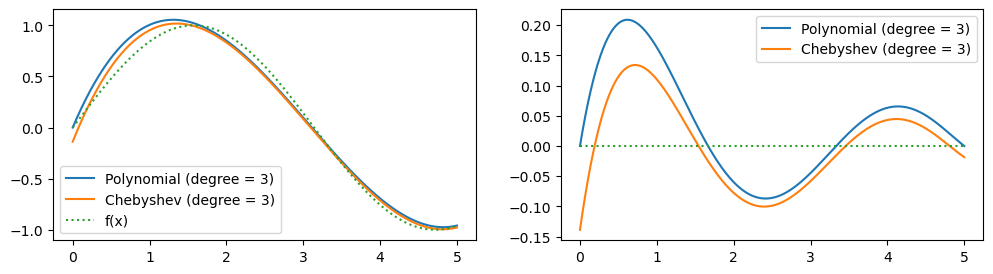

In [6]:
# Create the error and 
fig, axs = plt.subplots(1, 2, figsize=(12, 3))
axs[0].plot(
    x_pred, 
    y_pred_polynomial, 
    label='Polynomial (degree = {:d})'.format(degree)
)
axs[0].plot(
    x_pred, 
    y_pred_chebyshev, 
    label='Chebyshev (degree = {:d})'.format(degree)
)
axs[0].plot(x_pred, y_true, ':', label='f(x)')
axs[0].legend()

axs[1].plot(
    x_pred, 
    y_pred_polynomial - y_true,
    label='Polynomial (degree = {:d})'.format(degree)
)
axs[1].plot(
    x_pred, 
    y_pred_chebyshev - y_true,
    label='Chebyshev (degree = {:d})'.format(degree)
)
axs[1].plot(x_pred, np.zeros_like(x_pred), ':')
axs[1].legend()


print('\nMinimax property of the Chebyshev approximation')

print('Maximum error of the polynomial approximation: {:.4g}'.format(
        np.max(np.abs(error_pred_polynomial))
    )
)
print('Maximum error of the Chebyshev approximation: {:.4g}'.format(
        np.max(np.abs(error_pred_chebyshev))
    )
)

### Polynomial fit

In [7]:
# Generate synthetic data
x = np.linspace(a, b, num=11)                                                                                                  

noise_level = 0.2
rng = np.random.default_rng(seed=8123)
noise_y = noise_level * rng.standard_normal(np.size(x))
y_measured = f(x) + noise_y

Polynomial fit of degree 1: 
	 0.03562344 - 0.8220733·x 

Polynomial fit of degree 3: 
	 0.49638869 - 1.71267964·x - 1.15191315·x² + 1.2508516·x³ 

Polynomial fit of degree 5: 
	 0.46805281 - 1.55485376·x - 0.90594194·x² + 0.59554309·x³ -
0.24597121·x⁴ + 0.51734882·x⁵ 

Polynomial fit of degree 10: 
	 0.49997612 - 2.87979306·x - 3.23800638·x² + 23.09514663·x³ +
20.22057942·x⁴ - 97.30237752·x⁵ - 58.04630818·x⁶ + 150.10282942·x⁷ +
65.30452858·x⁸ - 73.46119837·x⁹ - 25.40758592·x¹⁰ 



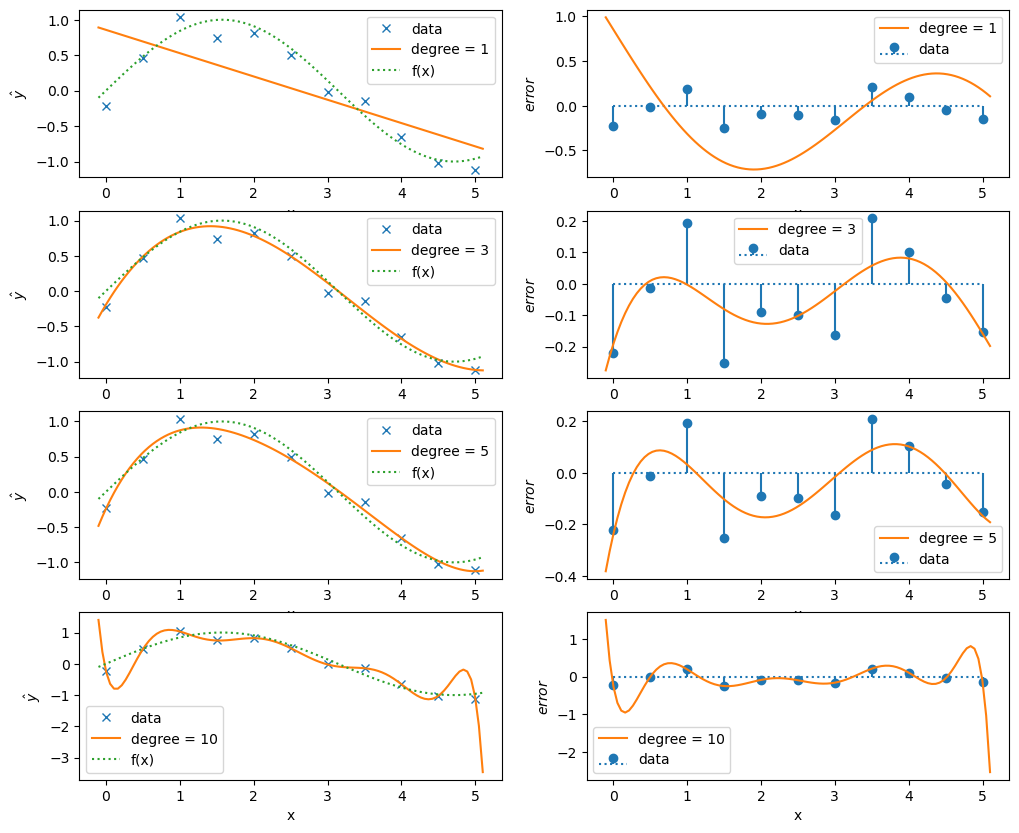

In [8]:
# Setup the fit
degrees = [1, 3, 5, len(y_measured)-1]

x_slack = 0.1
x_domain = (np.min(x) - x_slack, np.max(x) + x_slack)
n_domain = 100
x_pred = np.linspace(*x_domain, n_domain)
y_true = f(x_pred)

fig, ax = plt.subplots(len(degrees), 2, figsize=(12, 10))

for i, degree in enumerate(degrees):
    polynomial_fit = Polynomial.fit(x, y_measured, deg=degree) 
    
    print(
        'Polynomial fit of degree {:d}: \n\t'.format(degree), 
        polynomial_fit, 
        '\n'
    )
    
    x_pred, y_pred = polynomial_fit.linspace(n_domain, x_domain)
    
    ax[i, 0].plot(x, y_measured, 'x', label='data')
    ax[i, 0].plot(x_pred, y_pred, label='degree = {:d}'.format(degree))
    ax[i, 0].plot(x_pred, y_true, ':', label='f(x)')
    ax[i, 0].set_xlabel('x')
    ax[i, 0].set_ylabel('$\hat{y}$')
    ax[i, 0].legend()
    
    # ax[i, 1].plot(x, np.zeros_like(x), ':')
    ax[i, 1].stem(x, noise_y, basefmt=':', label='data')
    ax[i, 1].plot(
        x_pred, 
        y_pred - y_true, 
        label='degree = {:d}'.format(degree)
    )
    ax[i, 1].set_xlabel('x')
    ax[i, 1].set_ylabel('$error$')
    ax[i, 1].legend()

---

## Exercises
### 1. B-splines 
    * Splines in 5 minutes: Part 1 -- cubic curves: https://www.youtube.com/watch?v=YMl25iCCRew
    * Splines in 5 minutes: Part 2 -- splines:      https://www.youtube.com/watch?v=DLsqkWV6Cag
    * Splines in 5 minutes: Part 3 -- B-splines:    https://www.youtube.com/watch?v=JwN43QAlF50

#### A. Explain briefly what is a B-spline. Especifically, what is different between a B-spline and a natural cubic spline.

Una b-spline es una función curva y contínua definida por partes que pueden servir para aproximar valores entre una serie de puntos iniciales que llamamos puntos de control. Las b-splines consiguen continuidad en su primera y segunda derivada, dándole así continuidad en su pendiente y curvatura en todos los nudos de la función.

Al contrario que las splines cúbicas naturales, las b-splines no interpolan puesto que no pasa por los puntos de control iniciales. Gracias a esto la función tiende a ser suavizarse y adaptarse mejor a errores y ruido.

Otra ventaja es que las b-splines tienen **control local**, que les permite cambiar puntos de control afectando solo a la curva local y no a toda la función.

#### B. Use B-splines of different orders to fit the data with different noise levels. Comment the results, especially regarding robustness to noise:

In [9]:
# Function
f = np.sin

# Define the b-spline degrees to test (1<=k<=5)
b_spline_degrees = [1, 3, 5] 

# Noise parametres
noise_levels = [0.1, 0.6, 1]
rng = np.random.default_rng(seed=8123)

# Data parameters
domain_interval = (-5.0, 5.0)
num_control_points = 16
n_domain = 100
x_slack = 0.3

x = np.linspace(domain_interval[0], domain_interval[1], num=num_control_points)
x_domain = (domain_interval[0] - x_slack, domain_interval[1] + x_slack)

# Perfect data
x_true = np.linspace(*x_domain, n_domain)
y_true = f(x_true)

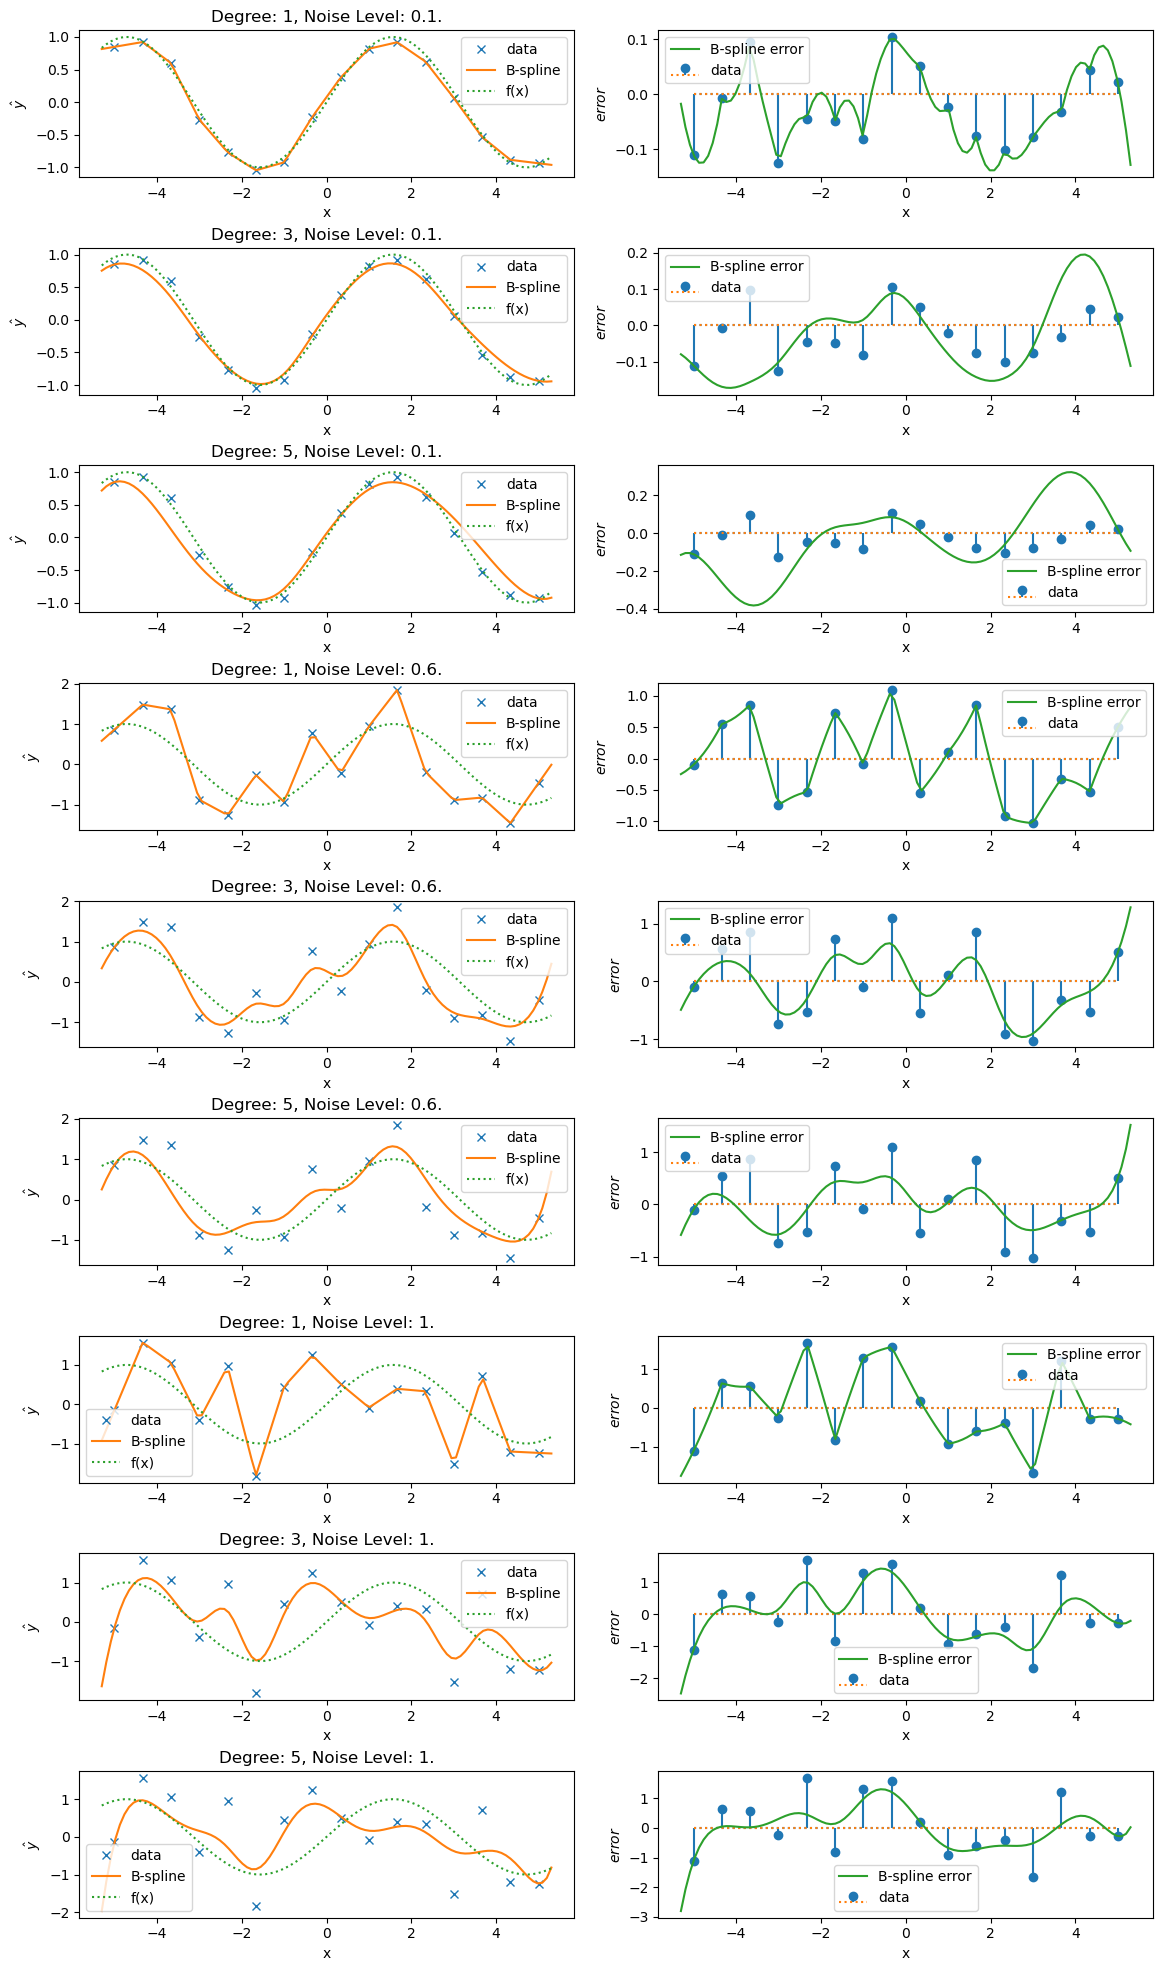

In [10]:
# Setup the fit
i = 0
fig, ax = plt.subplots(len(noise_levels) * len(b_spline_degrees), 2, figsize=(12, 20))
fig.tight_layout(pad=3.0)

for noise_level in noise_levels:
    
    noise_y = noise_level * rng.standard_normal(np.size(x))
    y_measured = f(x) + noise_y
    
    for k in b_spline_degrees:
        t, _, _ = sc.interpolate.splrep(x, y_measured, k=k) # retrieve the knots (t)
        b_spline_f = sc.interpolate.BSpline(t, y_measured, k)
        
        x_pred = np.linspace(*x_domain, n_domain)
        y_pred = b_spline_f(x_pred)
                
        ax[i, 0].plot(x, y_measured, 'x', label='data')
        ax[i, 0].plot(x_pred, y_pred, label='B-spline')
        ax[i, 0].plot(x_pred, y_true, ':', label='f(x)')
        ax[i, 0].set_xlabel('x')
        ax[i, 0].set_ylabel('$\hat{y}$')
        ax[i, 0].legend()
        ax[i, 0].set_title(f'Degree: {k}, Noise Level: {noise_level}.')
        
        ax[i, 1].plot(x, np.zeros_like(x), ':')
        ax[i, 1].stem(x, noise_y, basefmt=':', label='data')
        ax[i, 1].plot(
            x_pred, 
            y_pred - y_true, 
            label='B-spline error'
        )
        ax[i, 1].set_xlabel('x')
        ax[i, 1].set_ylabel('$error$')
        ax[i, 1].legend()

        i += 1

#### Resultados.

A mayor grado, las curvas tienden a suavizarse más. 

Cuando hay menos ruido, los grados bajos funcionan mejor puesto que se acercan más a los puntos de control. Los grados altos al suavizar la curva se separan más de la medida real.

Cuando hay más ruido, los grados bajos se ajustan demasiado bien a los puntos de control, tienden a hacer overfit y les arrastra el ruido de los datos. Por otra parte los grados altos funcionen mejor puesto que suavizan la curva y generalizan bastante bien, acercándose más a la medida real.

---

### 2. Smoothing splines (https://youtu.be/queK1reC-ac?si=6JI5OHoLjVZ4yGLi)

#### A. Explain briefly what is a smoothing spline. Especifically, what is different between a Smoothing splines and a natural cubic spline?

Las smoothing splines consisten en encontrar una función que intenta minimizar el error cuadrático medio de los puntos de la muestra respecto a la función con la que se aproxima, y al mismo tiempo, evitar funciones con curvas que se ajustan demasiado a los datos. Esto último se consigue suavizando la curva, como resumen las smoothing splines buscan un equilibrio entre suavizar la curva y cómo de bien se ajusta a los puntos de control para encontrar un punto adecuado entre el 'overfit' y el 'underfit' de la función a los datos. De esta manera, la función resultante ya no interpola los puntos sino que se acerca a ellos, dejando ver una curva más representativa de cómo puede que se comporten estos datos.

Al igual que las b-splines, las smoothing splines se diferencian de las splines cúbicas naturales porque la curva resultante no interpola los puntos de control, a cambio podemos jugar con la suavidad de la curva para compensar en la función los errores y el ruido de los datos iniciales.

#### B. Use smoothing splines to fit the data for different noise leves, using different values of the smoothing parameter.

En las gráficas de la siguiente celda se puede observar que los smoothing splines son capaces de realizar decentemente buenas aproximaciones a pesar del aumento de ruido. Sin embargo, la versión sin suavizar interpola los puntos de la muestra a cambio de perder la tendencia que siguen los datos.

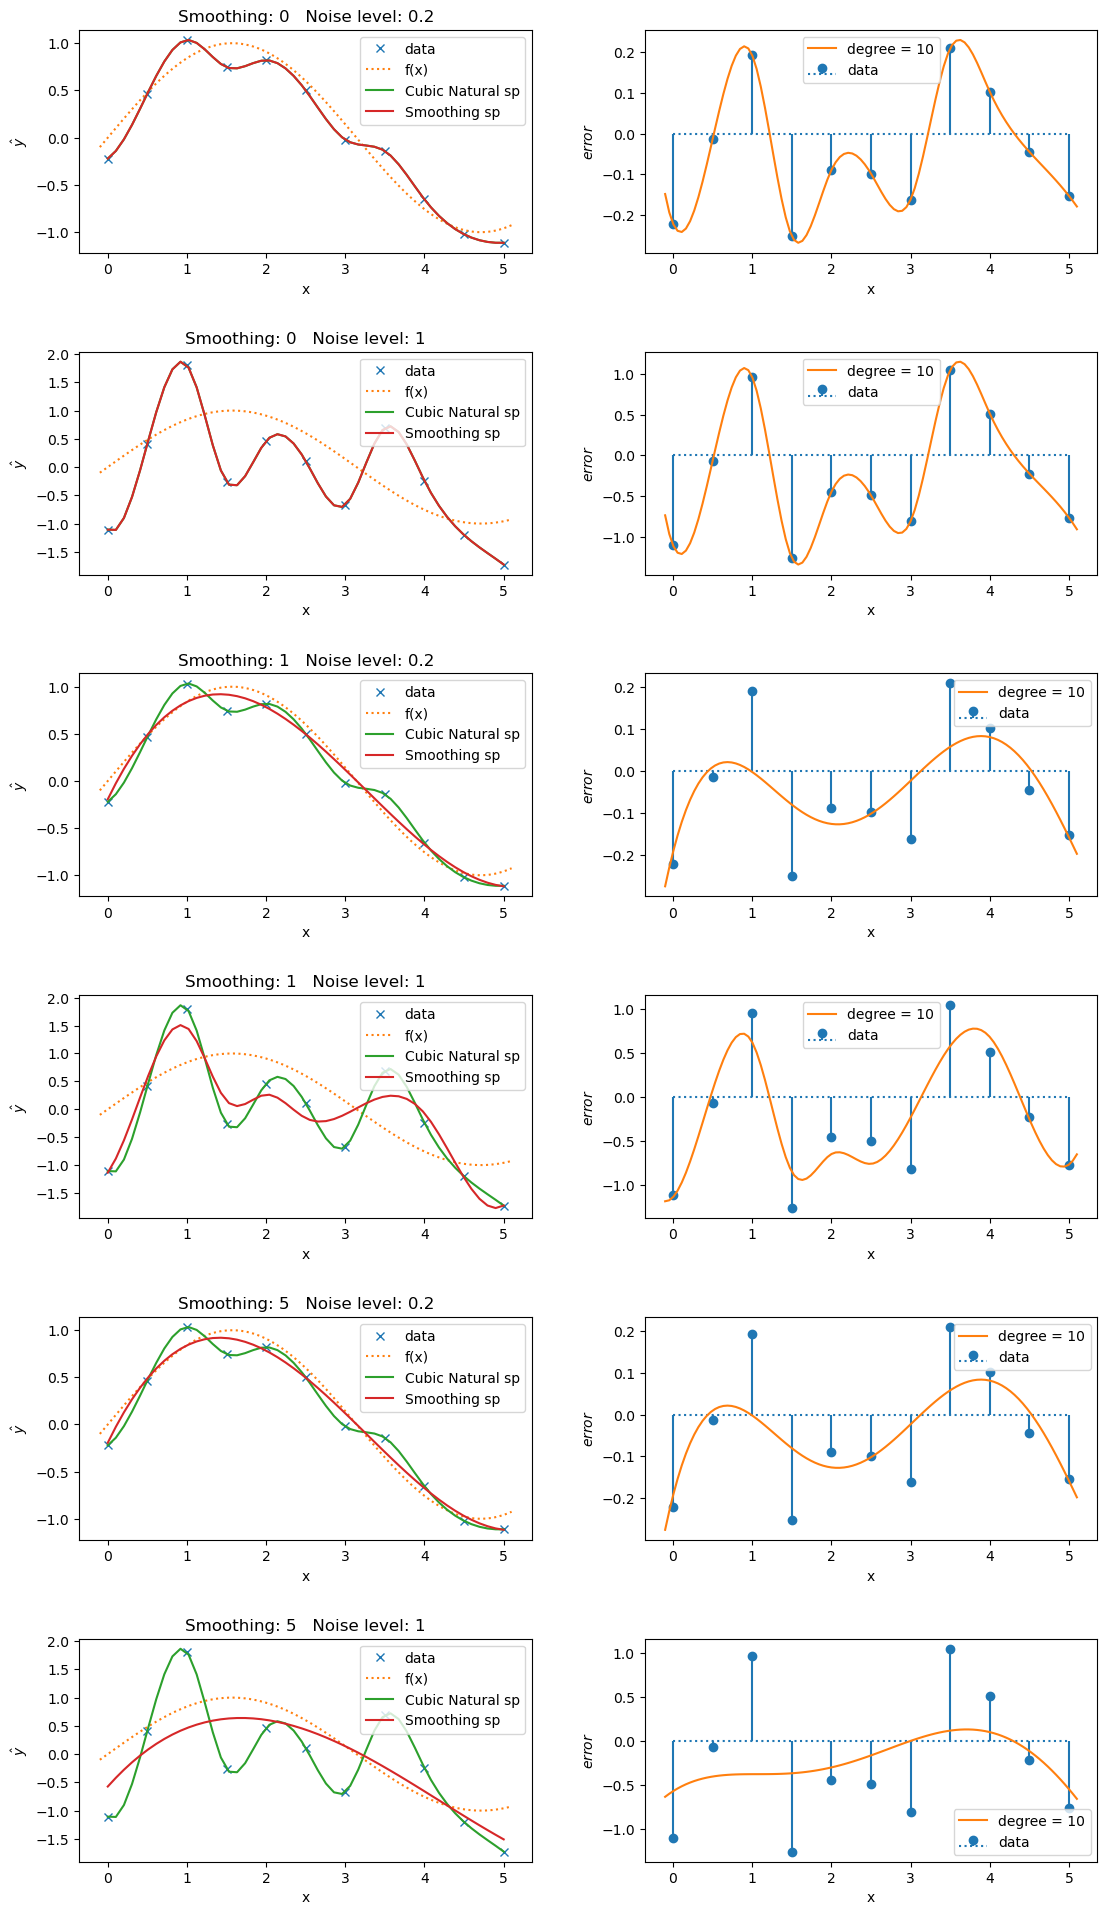

In [11]:
s_values = [0, 1, 5]

x = np.linspace(a, b, num=11)
x_morevalues = np.linspace(a, b, num=50)     

noise_levels = [0.2, 1]


x_slack = 0.1
x_domain = (np.min(x) - x_slack, np.max(x) + x_slack)
n_domain = 100
x_pred = np.linspace(*x_domain, n_domain)
y_true = f(x_pred)

fig, ax = plt.subplots(len(s_values)*len(noise_levels), 2, figsize=(12, 20))
fig.tight_layout(pad=5.0)

for i, (s_value, noise_level) in enumerate([(f,s) for f in s_values for s in noise_levels]):
    rng = np.random.default_rng(seed=8123)
    noise_y = noise_level * rng.standard_normal(np.size(x))
    y_measured = f(x) + noise_y

    ax[i, 0].plot(x, y_measured, 'x', label='data')
    ax[i, 0].plot(x_pred, y_true, ':', label='f(x)')
    smooth_spline = sc.interpolate.splrep(x, y_measured, s=s_value)
    y_smooth = sc.interpolate.splev(x_morevalues, smooth_spline, der=0)
    cubic_spline = sc.interpolate.CubicSpline(x, y_measured)
    y_cubic = cubic_spline(x_morevalues)

    ax[i, 0].plot(x_morevalues, y_cubic, label='Cubic Natural sp')
    ax[i, 0].plot(x_morevalues, y_smooth, label='Smoothing sp')
    ax[i, 0].set_xlabel('x')
    ax[i, 0].set_ylabel('$\hat{y}$')
    ax[i, 0].legend()

    ax[i, 1].stem(x, noise_y, basefmt=':', label='data')
    y_pred = sc.interpolate.splev(x_pred, smooth_spline, der=0)
    ax[i, 1].plot(
        x_pred, 
        y_pred - y_true, 
        label='degree = {:d}'.format(degree)
    )
    ax[i, 1].set_xlabel('x')
    ax[i, 1].set_ylabel('$error$')
    ax[i, 1].legend()
    ax[i, 0].set_title(f'Smoothing: {s_value}   Noise level: {noise_level}')

#### C. D. Comment the results, especially regarding robustness to noise. What happens if the smoothing parameter is very small? And if it is very large?

Como ocurre con las b-splines, si la suavidad que tiene la curva es muy pequeña (o nula) se acerca demasiado bien a los datos originales, esto funciona muy bien para interpolar cuando el ruido o los errores tienen magnitudes pequeñas. Sin embargo cuando el ruido es grande, sufre de 'overfit' y se aleja mucho de los verdaderos valores de la función.

Cuanto más grande el ruido, las curvas más suaves se comportan mejor. Hay que encontrar un equilibrio entre la suavidad y el MSE para que generalice suficientemente bien y no haga 'overfit', pero tampoco queremos un suavizado demasiado grande y que sufra de 'underfit'.

#### E. Comment the differences between the results with splines and with smoothing splines.

Como vemos, cuando la curvatura es 0 la smoothing spline se comporta de forma similar a la cubic natural spline. Al ir aumentando la curvatura las diferencias son más notables, la smoothing spline suaviza su curva de forma que generaliza mejor para ruidos altos pero se comporta peor cuando los ruidos tienen magnitudes bajas.

---

### 3. Aproximation for the cdf of the standard Gaussian.

The cdf of the standard Gaussian is defined as $\text{norm.cdf}(x) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^x dz e^{-\frac{z^2}{2}}$. The direct computation of this funtion by numerical quadrature is costly. Therefore, one generarally resorts to approximations that can be computed efficiently. Give such three different closed-form approximations of the funcion and compare their errors in the support of the distribution. Provide an empirical analysis of their computational costs.

(TODO: remove https://www.ijser.org/researchpaper/Approximations-to-Standard-Normal-Distribution-Function.pdf)

---

### Approximation via Taylor series
$$
    f(x) = f(x0) + f'(x0)(x-x0) + \frac{1}{2!}f''(x0)(x-x0)^2 + ERROR
$$

where the following goes for the norm.cdf with x0 = 0

$$
    f(x) = 0.5 + \frac{1}{\sqrt{2\pi}} * x + 0 
$$
The computational cost is constant since it doesn't have any loops?? parece una explicación un poco cutre ejej

The error es del orden de: (x - x0)**3??? no me acuerdo si esto es lo que había dicho en clase

In [12]:
def taylor_aproximation(x):
    x0 = 0
    y0 = 0.5
    
    return y0 + 1/np.sqrt(2 * np.pi) * x

In [13]:
x = np.array([-0.5, 0.25, 0.5, 1, 3])


scipy = sc.stats.norm.cdf(x)

print('Scipy\t', scipy)
print(f'taylor: {taylor_aproximation(x)}')
print(f'taylor error: {abs(taylor_aproximation(x) - scipy)}')

Scipy	 [0.30853754 0.59870633 0.69146246 0.84134475 0.9986501 ]
taylor: [0.30052886 0.59973557 0.69947114 0.89894228 1.69682684]
taylor error: [0.00800868 0.00102924 0.00800868 0.05759753 0.69817674]


In [14]:
# Tocher approximation

def Polya(x):
    less_than_zero = x < 0
    x = np.where(less_than_zero, -x, x)
    
    exponent = -2*np.square(x)/np.pi
    result = 0.5*(np.sqrt(1 - np.exp(exponent)) +1)

    return np.where(less_than_zero, 1 - result, result)

def Tocher(x):
    less_than_zero = x < 0
    x = np.where(less_than_zero, -x, x)
    
    k = np.sqrt(8/np.pi)
    numerator = np.exp(np.dot(k, x))
    denominator = 1 + numerator
    result = numerator/denominator
    
    return np.where(less_than_zero, 1 - result, result)


print('Scipy\t', scipy)
print('Tocher\t', Tocher(x))
print('Tocher error\t', abs(Tocher(x) - scipy))
print('Polya\t', Polya(x))
print('Polya error\t', abs(Polya(x) - scipy))

Scipy	 [0.30853754 0.59870633 0.69146246 0.84134475 0.9986501 ]
Tocher	 [0.31047821 0.59843351 0.68952179 0.83142623 0.99173403]
Tocher error	 [0.00194067 0.00027282 0.00194067 0.00991852 0.00691608]
Polya	 [0.30820858 0.59875166 0.69179142 0.84311885 0.99918723]
Polya error	 [3.28959732e-04 4.53312231e-05 3.28959732e-04 1.77410788e-03
 5.37125445e-04]


----

4. Explain what is Runge's phemomenon. 
    1. Give an illustrative example.
    2. Identify a strategy to avoid this phenomenon.    
5. Explain what are thin plate splines and provide an illustration.
6. Explain what are interpolating filters and provide an illustration (https://www.youtube.com/watch?v=Xj129kA3Ci0).
6. Explain how one would use interpolation to increase the number of frames per second in a movie. Provide an illustration.